In [184]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [185]:
data=pd.read_csv('../../Data/Raw/dataset_para_modelas_parte1.csv')
data1=pd.read_csv('../../Data/Raw/dataset_para_modelas_parte1.csv')
data_unida=pd.concat([data,data1])
data_unida.shape

C:\Users\ES01021353\AppData\Local\Temp\ipykernel_30512\918402829.py:1: DtypeWarning: Columns (5,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('../../Data/Raw/dataset_para_modelas_parte1.csv')
C:\Users\ES01021353\AppData\Local\Temp\ipykernel_30512\918402829.py:2: DtypeWarning: Columns (5,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data1=pd.read_csv('../../Data/Raw/dataset_para_modelas_parte1.csv')


(634682, 49)

# **INFORMACIÓN GENERAL DE LOS DATOS**
---

In [186]:
data_unida.info()

<class 'pandas.core.frame.DataFrame'>
Index: 634682 entries, 0 to 317340
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             634682 non-null  int64  
 1   cod_persona            634682 non-null  int64  
 2   mes                    634682 non-null  object 
 3   pais                   634570 non-null  object 
 4   sexo                   634566 non-null  object 
 5   edad                   634682 non-null  object 
 6   fecha1                 634570 non-null  object 
 7   xti_empleado           634570 non-null  object 
 8   xti_nuevo_cliente      634570 non-null  float64
 9   num_antiguedad         634682 non-null  object 
 10  xti_rel                634570 non-null  float64
 11  fec_ult_cli_1t         40 non-null      object 
 12  xti_rel_1mes           629758 non-null  float64
 13  tip_rel_1mes           629758 non-null  object 
 14  indresi                634570 non-null  o

# **TRATAMIENTO DE NULOS**
---

In [187]:
data_unida.isna().sum() #/ len(data_unida)

Unnamed: 0                    0
cod_persona                   0
mes                           0
pais                        112
sexo                        116
edad                          0
fecha1                      112
xti_empleado                112
xti_nuevo_cliente           112
num_antiguedad                0
xti_rel                     112
fec_ult_cli_1t           634642
xti_rel_1mes               4924
tip_rel_1mes               4924
indresi                     112
indext                      112
des_canal                  5892
xti_extra                   112
tip_dom                     112
cod_provincia              3278
xti_actividad_cliente       112
imp_renta                105170
id_segmento                6028
mean_engagement            4924
ind_prod1                     0
ind_prod2                     0
ind_prod3                     0
ind_prod4                     0
ind_prod5                     0
ind_prod6                     0
ind_prod7                     0
ind_prod

In [188]:
#Imponemos un umbral del 5%
umbral=len(data_unida)*0.05
# Iterar sobre cada columna y eliminar los registros nulos si el número de valores nulos es menor que el umbral
for columna in data_unida.columns:
    # Contar los valores nulos en la columna actual
    nulos_en_columna = data_unida[columna].isnull().sum()

    # Verificar si el número de valores nulos está por debajo del umbral
    if nulos_en_columna < umbral:
        # Eliminar los registros nulos en la columna actual
        data_unida = data_unida.dropna(subset=columna)

In [189]:
data_unida.isna().sum() #/ len(data_unida)

Unnamed: 0                    0
cod_persona                   0
mes                           0
pais                          0
sexo                          0
edad                          0
fecha1                        0
xti_empleado                  0
xti_nuevo_cliente             0
num_antiguedad                0
xti_rel                       0
fec_ult_cli_1t           625432
xti_rel_1mes                  0
tip_rel_1mes                  0
indresi                       0
indext                        0
des_canal                     0
xti_extra                     0
tip_dom                       0
cod_provincia                 0
xti_actividad_cliente         0
imp_renta                100030
id_segmento                   0
mean_engagement               0
ind_prod1                     0
ind_prod2                     0
ind_prod3                     0
ind_prod4                     0
ind_prod5                     0
ind_prod6                     0
ind_prod7                     0
ind_prod

In [190]:
data_unida.shape

(625470, 49)

## Conversión de variables y eliminación

In [192]:

data_unida['fecha1']=pd.to_datetime(data_unida['fecha1'])
data_unida['mes']=pd.to_datetime(data_unida['mes'])
data_unida['fec_ult_cli_1t']=pd.to_datetime(data_unida['fec_ult_cli_1t'])
data_unida['num_antiguedad']=data_unida['num_antiguedad'].astype('int')
#Extraído el nombre del mes
data_unida['nombre_mes']=data_unida['mes'].dt.strftime("%B")
data_unida['xti_nuevo_cliente']=data_unida['xti_nuevo_cliente'].astype('category')
data_unida['xti_actividad_cliente']=data_unida['xti_actividad_cliente'].astype('category')
data_unida['ind_prod3']=data_unida['ind_prod3'].astype('category')
data_unida['xti_rel']=data_unida['xti_rel'].astype('category')
data_unida['edad']=data_unida['edad'].astype('int')
#Todas las ind_prod tienen valores 1-0, por lo tanto las he convertido en categóricas para representarlas
for i in range(1,26):
    data_unida[f'ind_prod{i}']=data_unida[f'ind_prod{i}'].astype('category')
#Eliminadas las columnas mes, y las que tienen valores constantes
data_unida.drop(['tip_rel_1mes','tip_dom','xti_rel_1mes','mes'],axis=1,inplace=True)

# **ANÁLISIS DESCRIPTIVO DE VARIABLES NUMÉRICAS**
---

In [193]:
#Primera mitad del dataset
data_unida.iloc[:,:round(data_unida.shape[1]/2)].describe()

,Unnamed: 0,cod_persona,edad,fecha1,num_antiguedad,fec_ult_cli_1t,cod_provincia,imp_renta,mean_engagement
count,625470.000000,6.254700e+05,625470.000000,625470,625470.000000,38,625470.000000,5.254400e+05,625470.000000
mean,160530.425363,7.566827e+05,40.349545,2008-09-20 23:53:59.188451072,81.068870,2015-08-08 06:18:56.842105344,26.613571,1.370771e+05,6.433374
min,0.000000,1.131900e+05,3.000000,1995-01-16 00:00:00,1.000000,2015-07-28 00:00:00,1.000000,4.559550e+03,1.950571
25%,80348.250000,4.028700e+05,24.000000,2003-12-19 00:00:00,24.000000,2015-07-28 00:00:00,15.000000,6.822339e+04,5.117500
50%,160283.000000,6.463520e+05,39.000000,2011-06-29 00:00:00,48.000000,2015-07-30 00:00:00,28.000000,1.015195e+05,6.463518
75%,240839.750000,1.121694e+06,51.000000,2013-08-01 00:00:00,137.000000,2015-08-17 18:00:00,34.000000,1.570141e+05,7.359949
max,322352.000000,1.537800e+06,117.000000,2015-08-31 00:00:00,248.000000,2015-09-24 00:00:00,52.000000,2.889440e+07,11.035174
std,92767.978336,4.095993e+05,17.092215,NaN,65.334409,NaN,12.717699,3.350825e+05,1.313445


In [194]:
#Segunda mitad del dataset
data_unida.iloc[:,round(data_unida.shape[1]/2):].describe()

,ind_prod4,ind_prod5,ind_prod6,ind_prod7,ind_prod8,ind_prod9,ind_prod10,ind_prod11,ind_prod12,ind_prod13,...,ind_prod17,ind_prod18,ind_prod19,ind_prod20,ind_prod21,ind_prod22,ind_prod23,ind_prod24,ind_prod25,nombre_mes
count,625470,625470,625470,625470,625470,625470,625470,625470,625470,625470,...,625470,625470,625470,625470,625470,625470.0,625470.0,625470,625470,625470
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2.0,2.0,2,2,10
top,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,0,September
freq,625120,569632,618312,618918,531146,593930,623662,623976,593820,568714,...,623498,588854,592900,607280,622748,586702.0,583494.0,537268,578970,83430


## Variables numéricas

In [195]:
continuas = []
for c in data_unida.columns:
    t = str(data_unida[c].dtype)
    if ("int" in t or "float" in t):
        continuas.append(c)
continuas

['Unnamed: 0',
 'cod_persona',
 'edad',
 'num_antiguedad',
 'cod_provincia',
 'imp_renta',
 'mean_engagement']

In [196]:
# Create SimpleImputer
imputer = SimpleImputer(strategy='median')

# Fit and transform the imputer to the data
data_unida[continuas] = imputer.fit_transform(data_unida[continuas])

-------------------------- Análisis de la variable:  Unnamed: 0
Porcentaje de nulos;  0.0
Media de la variable:  160530.42536332677
Mediana de la variable:  160283.0
Percentil 25 de la variable:  80348.25
Percentil 75 de la variable:  240839.75


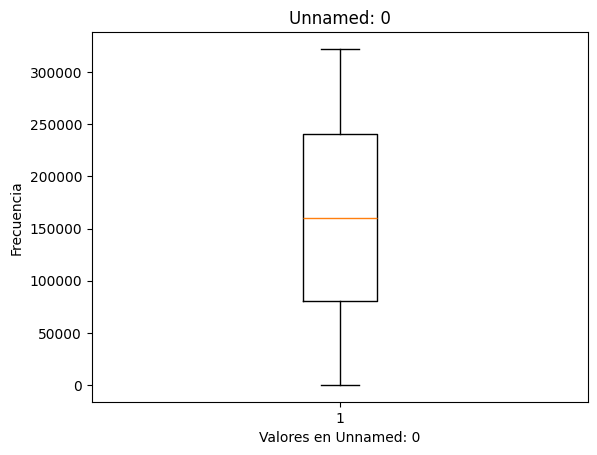

-------------------------- Análisis de la variable:  cod_persona
Porcentaje de nulos;  0.0
Media de la variable:  756682.694728764
Mediana de la variable:  646352.0
Percentil 25 de la variable:  402870.0
Percentil 75 de la variable:  1121694.25


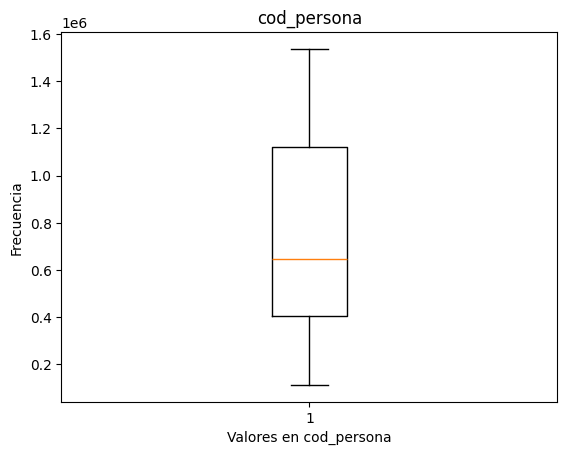

-------------------------- Análisis de la variable:  edad
Porcentaje de nulos;  0.0
Media de la variable:  40.349545142053174
Mediana de la variable:  39.0
Percentil 25 de la variable:  24.0
Percentil 75 de la variable:  51.0


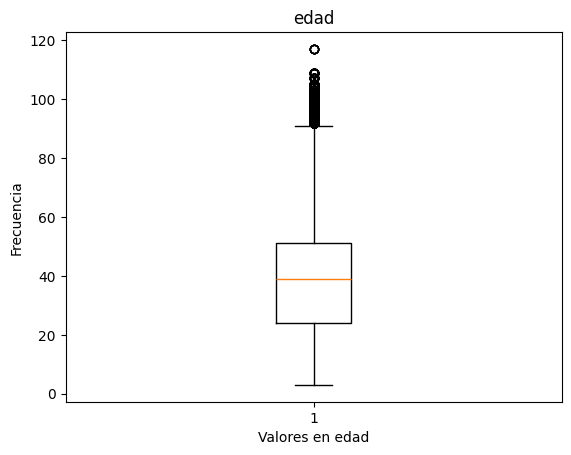

-------------------------- Análisis de la variable:  num_antiguedad
Porcentaje de nulos;  0.0
Media de la variable:  81.06886980990295
Mediana de la variable:  48.0
Percentil 25 de la variable:  24.0
Percentil 75 de la variable:  137.0


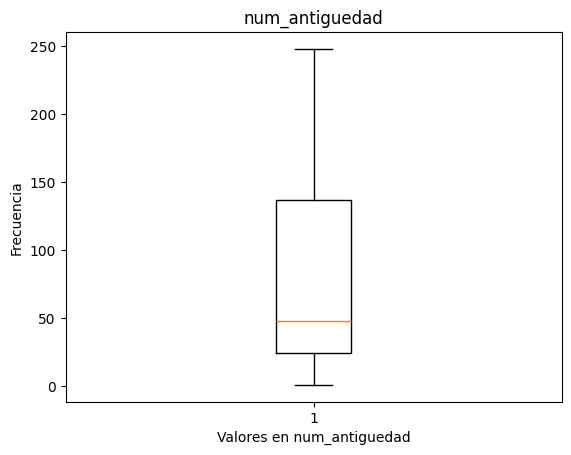

-------------------------- Análisis de la variable:  cod_provincia
Porcentaje de nulos;  0.0
Media de la variable:  26.613570594912627
Mediana de la variable:  28.0
Percentil 25 de la variable:  15.0
Percentil 75 de la variable:  34.0


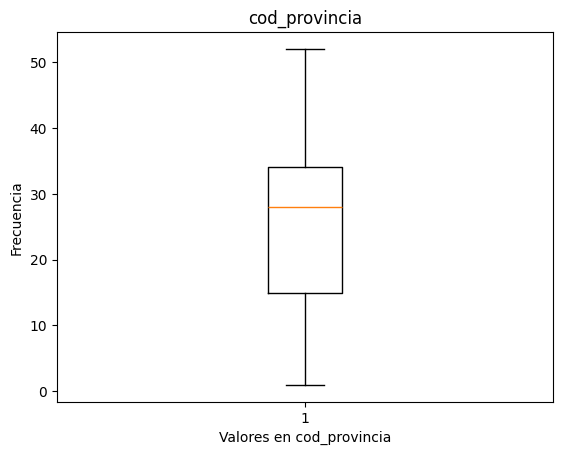

-------------------------- Análisis de la variable:  imp_renta
Porcentaje de nulos;  0.0
Media de la variable:  131390.47204700462
Mediana de la variable:  101519.49
Percentil 25 de la variable:  73923.84
Percentil 75 de la variable:  142857.69


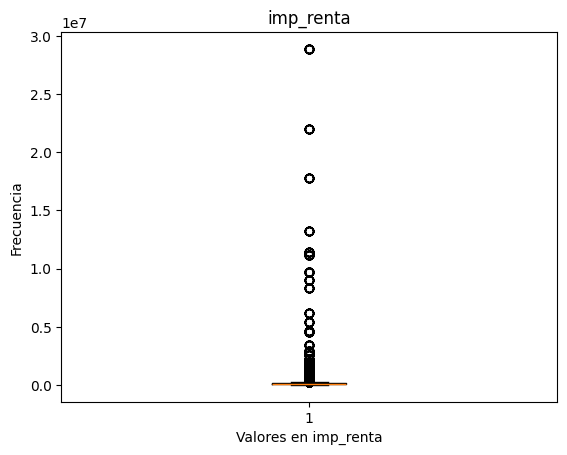

-------------------------- Análisis de la variable:  mean_engagement
Porcentaje de nulos;  0.0
Media de la variable:  6.433374190204995
Mediana de la variable:  6.463518112854217
Percentil 25 de la variable:  5.117499600033625
Percentil 75 de la variable:  7.359948543002247


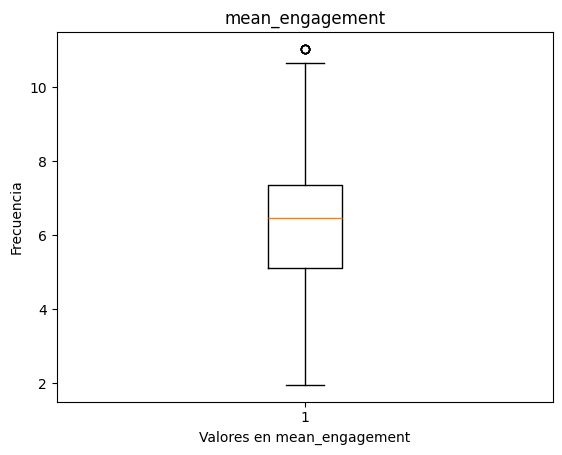

In [197]:
#Número de registros
n= 625470
for col in continuas:
  print("-------------------------- Análisis de la variable: ", col)
  # Cantidad de nulos
  cantidad_nulos = data_unida[col].isnull().sum()
  print("Porcentaje de nulos; ", cantidad_nulos / n * 100)
  # Medias/medianas percentil
  print("Media de la variable: ", data_unida[col].mean())
  print("Mediana de la variable: ", data_unida[col].median())
  print("Percentil 25 de la variable: ", data_unida[col].quantile(0.25))
  print("Percentil 75 de la variable: ", data_unida[col].quantile(0.75))
  plt.boxplot(data_unida[col])
  plt.xlabel('Valores en ' + col)
  plt.ylabel('Frecuencia')
  plt.title(col)
  plt.show()
  


# **ANÁLISIS DESCRIPTIVO DE VARIABLES CATEGÓRICAS**
---

In [198]:
data_unida.describe(include=['object','category'])

,pais,sexo,xti_empleado,xti_nuevo_cliente,xti_rel,indresi,indext,des_canal,xti_extra,xti_actividad_cliente,...,ind_prod17,ind_prod18,ind_prod19,ind_prod20,ind_prod21,ind_prod22,ind_prod23,ind_prod24,ind_prod25,nombre_mes
count,625470,625470,625470,625470.0,625470.0,625470,625470,625470,625470,625470.0,...,625470,625470,625470,625470,625470,625470.0,625470.0,625470,625470,625470
unique,1,2,4,2.0,2.0,1,2,126,2,2.0,...,2,2,2,2,2,2.0,2.0,2,2,10
top,ES,V,N,0.0,1.0,S,N,KHE,N,0.0,...,0,0,0,0,0,0.0,0.0,0,0,September
freq,625470,343150,624954,612748.0,625432.0,625470,598644,209094,624072,315400.0,...,623498,588854,592900,607280,622748,586702.0,583494.0,537268,578970,83430


## Variables categóricas

In [199]:

categoricas = []
for c in data_unida.columns:
    t = str(data_unida[c].dtype)
    if "object" in t or "category" in t:
        categoricas.append(c)
categoricas

['pais',
 'sexo',
 'xti_empleado',
 'xti_nuevo_cliente',
 'xti_rel',
 'indresi',
 'indext',
 'des_canal',
 'xti_extra',
 'xti_actividad_cliente',
 'id_segmento',
 'ind_prod1',
 'ind_prod2',
 'ind_prod3',
 'ind_prod4',
 'ind_prod5',
 'ind_prod6',
 'ind_prod7',
 'ind_prod8',
 'ind_prod9',
 'ind_prod10',
 'ind_prod11',
 'ind_prod12',
 'ind_prod13',
 'ind_prod14',
 'ind_prod15',
 'ind_prod16',
 'ind_prod17',
 'ind_prod18',
 'ind_prod19',
 'ind_prod20',
 'ind_prod21',
 'ind_prod22',
 'ind_prod23',
 'ind_prod24',
 'ind_prod25',
 'nombre_mes']

In [200]:
# Create SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer to the data
data_unida[categoricas] = imputer.fit_transform(data_unida[categoricas])

Porcentaje de nulos;  0.0
Frecuencia de categorías:
pais
ES    625470
Name: count, dtype: int64


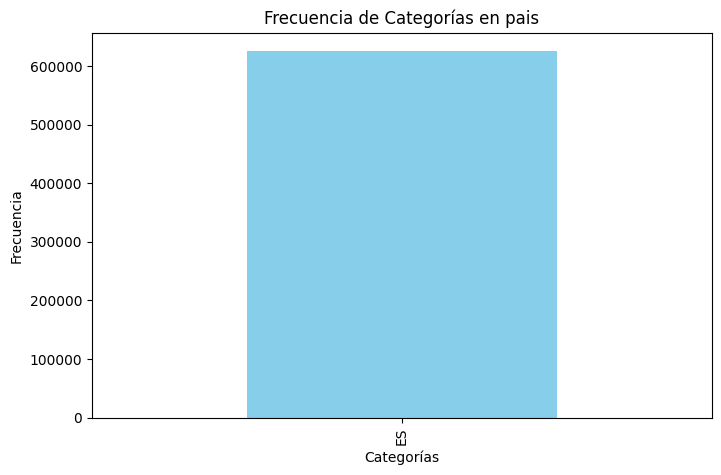

Porcentaje de nulos;  0.0
Frecuencia de categorías:
sexo
V    343150
H    282320
Name: count, dtype: int64


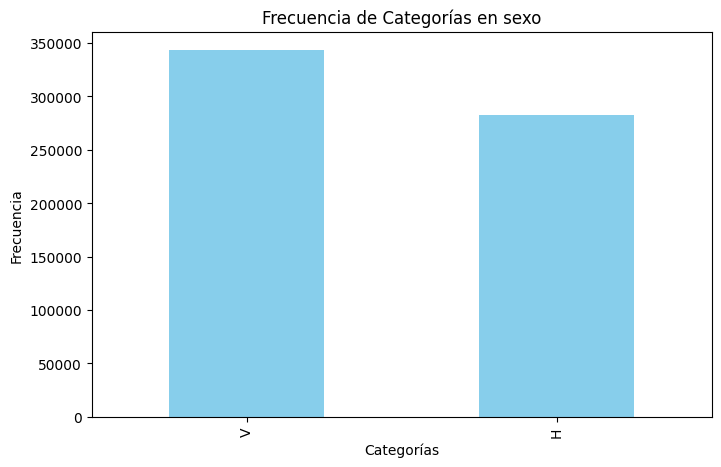

Porcentaje de nulos;  0.0
Frecuencia de categorías:
xti_empleado
N    624954
A       222
B       186
F       108
Name: count, dtype: int64


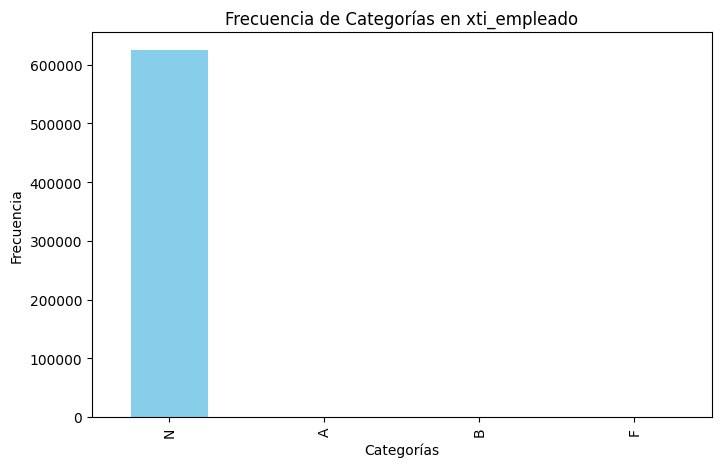

Porcentaje de nulos;  0.0
Frecuencia de categorías:
xti_nuevo_cliente
0.0    612748
1.0     12722
Name: count, dtype: int64


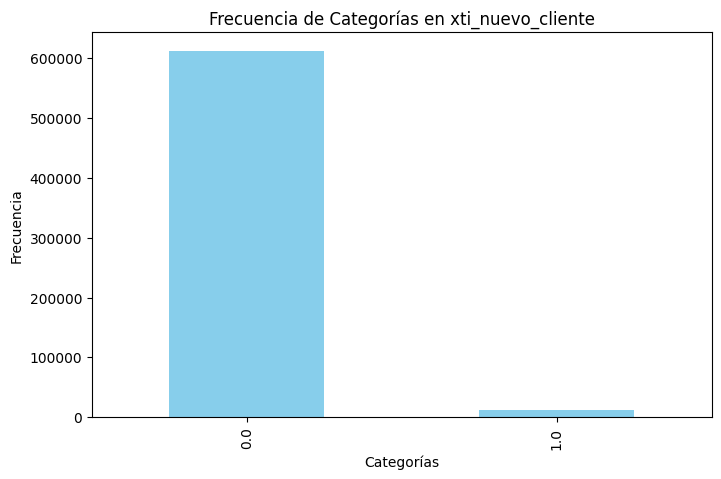

Porcentaje de nulos;  0.0
Frecuencia de categorías:
xti_rel
1.0     625432
99.0        38
Name: count, dtype: int64


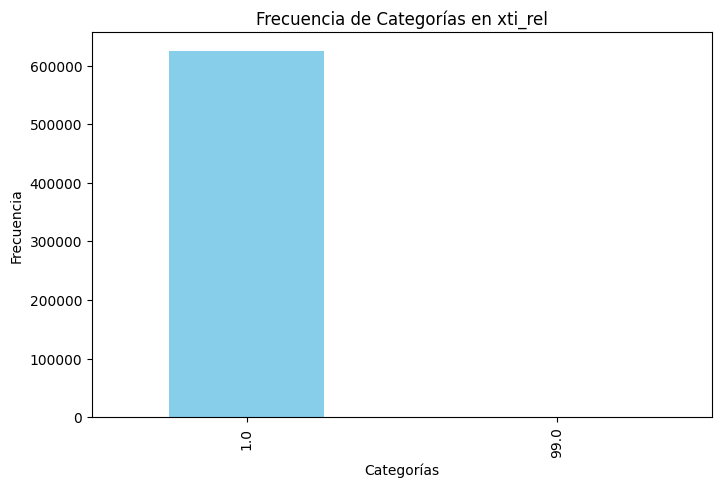

Porcentaje de nulos;  0.0
Frecuencia de categorías:
indresi
S    625470
Name: count, dtype: int64


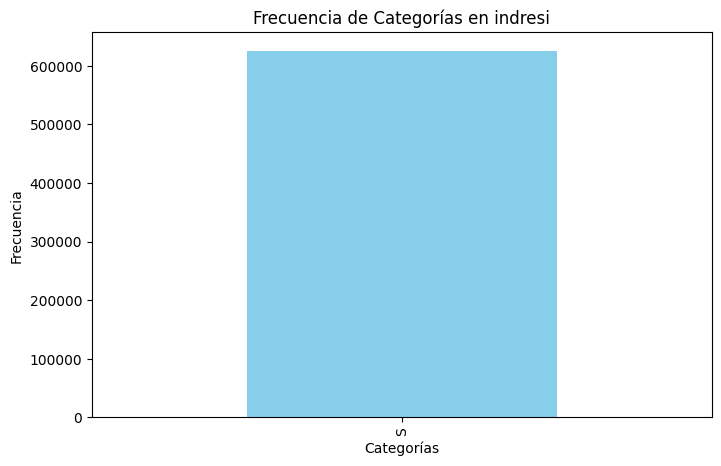

Porcentaje de nulos;  0.0
Frecuencia de categorías:
indext
N    598644
S     26826
Name: count, dtype: int64


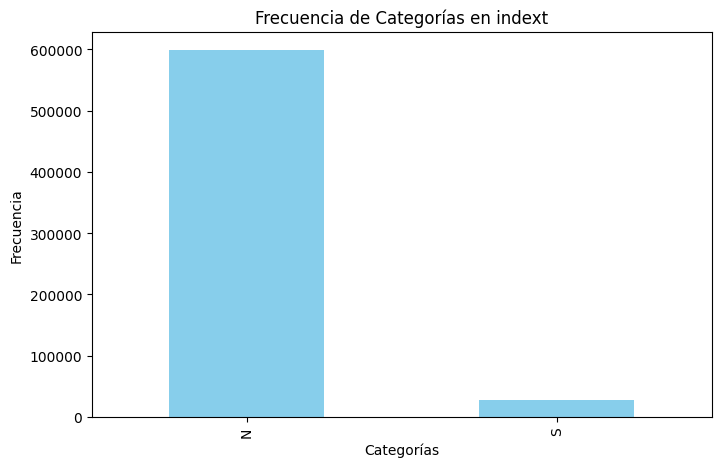

Porcentaje de nulos;  0.0
Frecuencia de categorías:
des_canal
KHE    209094
KAT    158906
KFC    150892
KFA     19580
KHK     10628
        ...  
KCQ         6
KFM         6
KCP         6
KDV         6
KHP         4
Name: count, Length: 126, dtype: int64


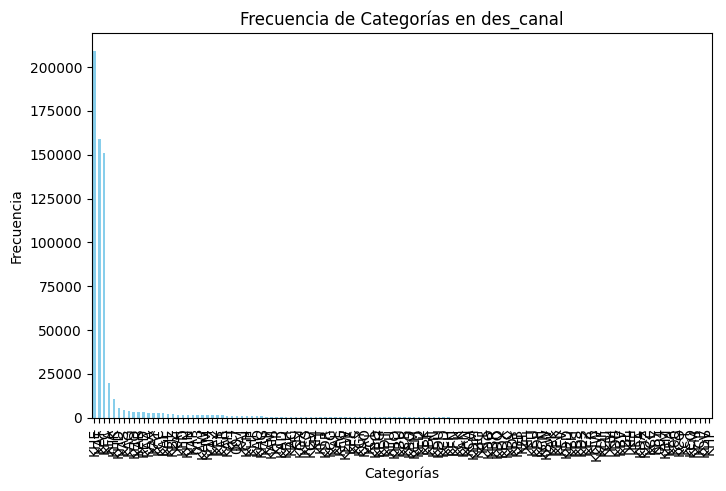

Porcentaje de nulos;  0.0
Frecuencia de categorías:
xti_extra
N    624072
S      1398
Name: count, dtype: int64


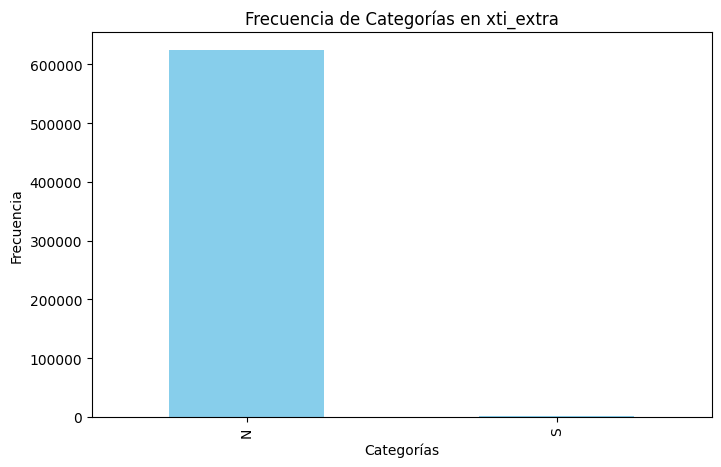

Porcentaje de nulos;  0.0
Frecuencia de categorías:
xti_actividad_cliente
0.0    315400
1.0    310070
Name: count, dtype: int64


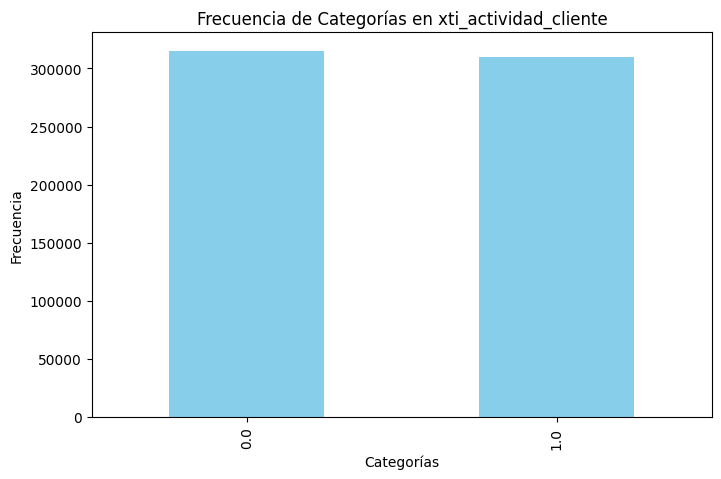

Porcentaje de nulos;  0.0
Frecuencia de categorías:
id_segmento
02 - PARTICULARES     369704
03 - UNIVERSITARIO    227094
01 - TOP               28672
Name: count, dtype: int64


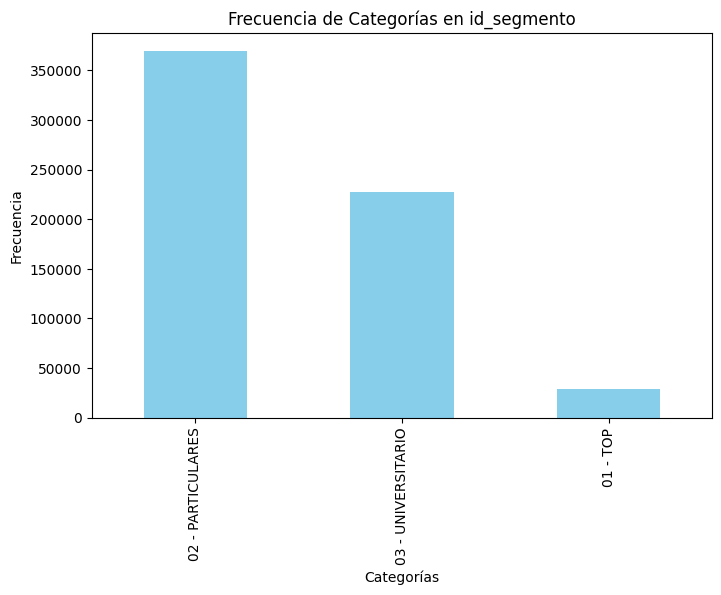

Porcentaje de nulos;  0.0
Frecuencia de categorías:
ind_prod1
0    625398
1        72
Name: count, dtype: int64


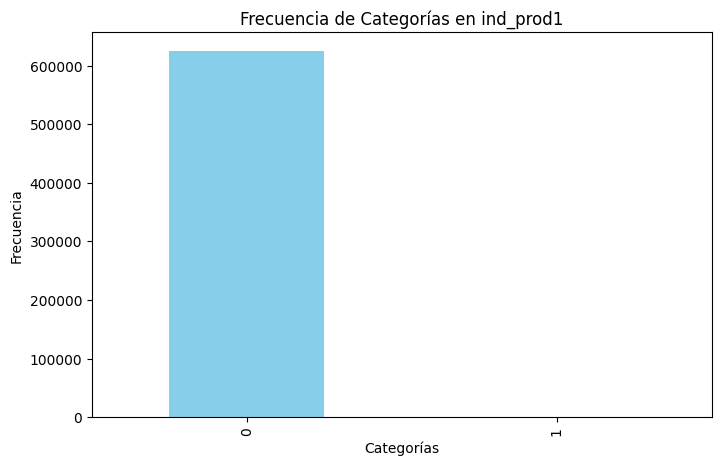

Porcentaje de nulos;  0.0
Frecuencia de categorías:
ind_prod2
0    625470
Name: count, dtype: int64


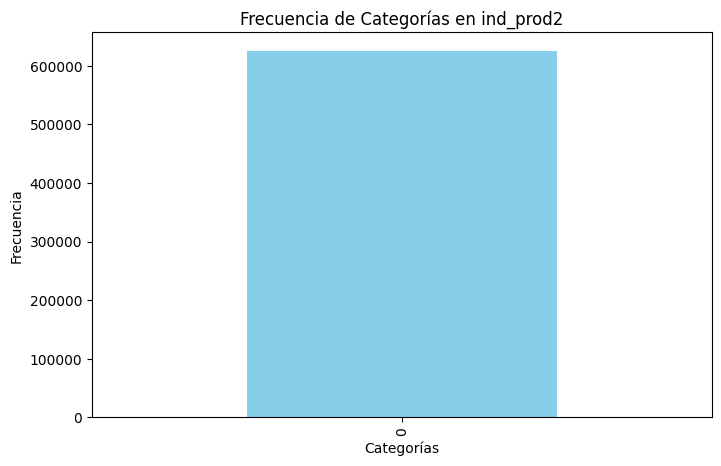

Porcentaje de nulos;  0.0
Frecuencia de categorías:
ind_prod3
1    447210
0    178260
Name: count, dtype: int64


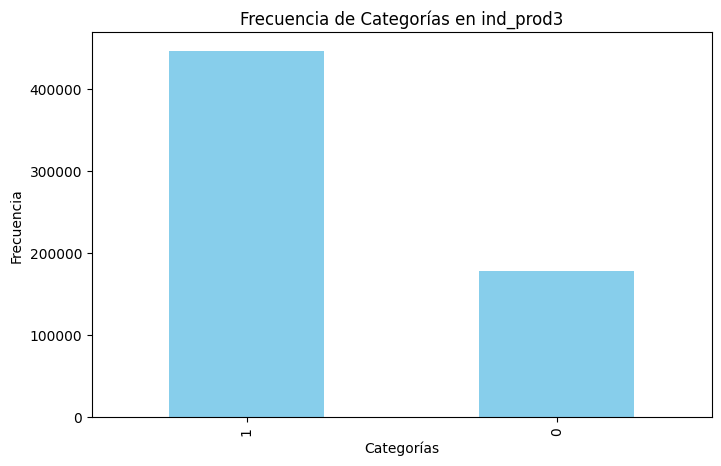

Porcentaje de nulos;  0.0
Frecuencia de categorías:
ind_prod4
0    625120
1       350
Name: count, dtype: int64


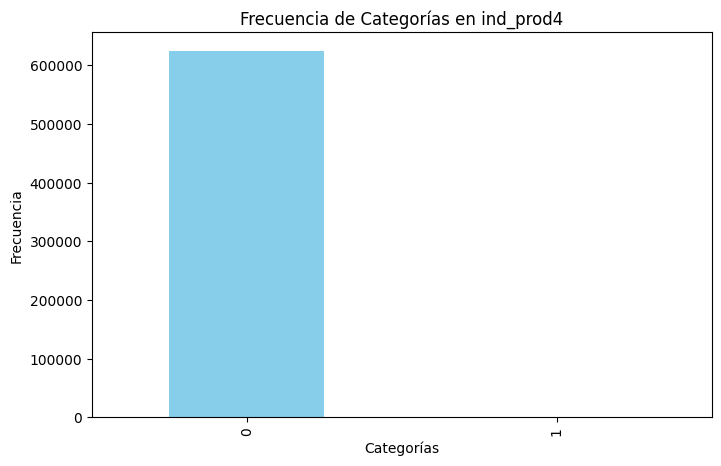

Porcentaje de nulos;  0.0
Frecuencia de categorías:
ind_prod5
0    569632
1     55838
Name: count, dtype: int64


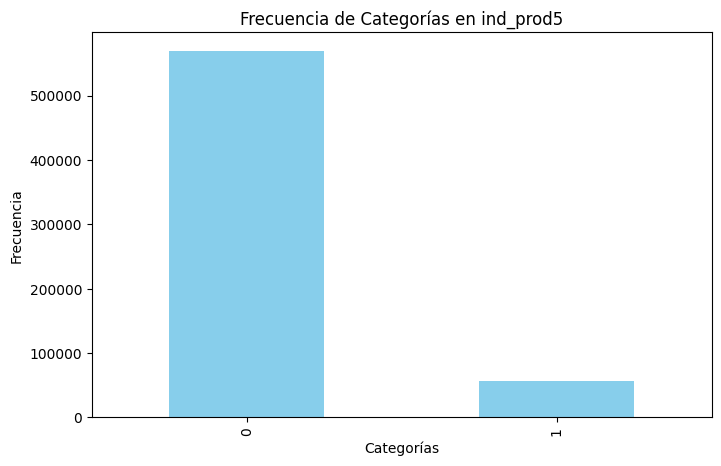

Porcentaje de nulos;  0.0
Frecuencia de categorías:
ind_prod6
0    618312
1      7158
Name: count, dtype: int64


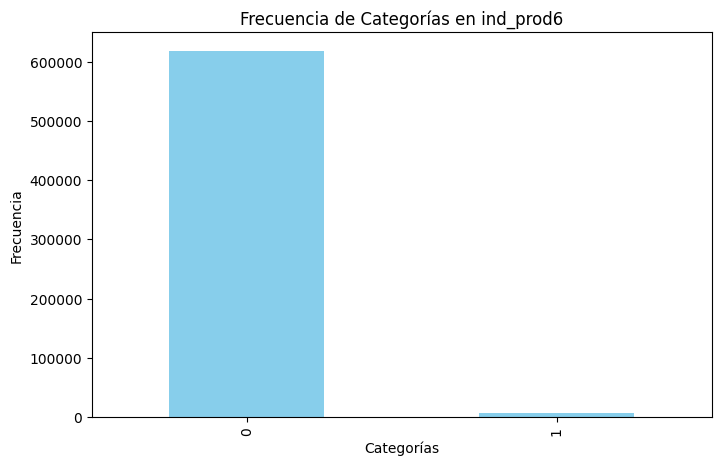

Porcentaje de nulos;  0.0
Frecuencia de categorías:
ind_prod7
0    618918
1      6552
Name: count, dtype: int64


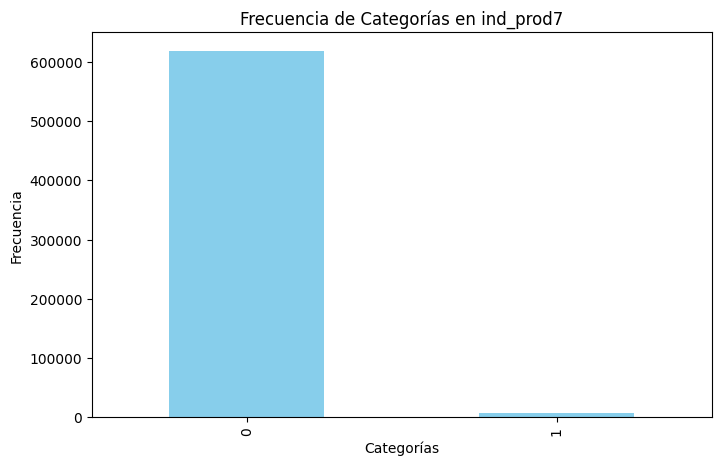

Porcentaje de nulos;  0.0
Frecuencia de categorías:
ind_prod8
0    531146
1     94324
Name: count, dtype: int64


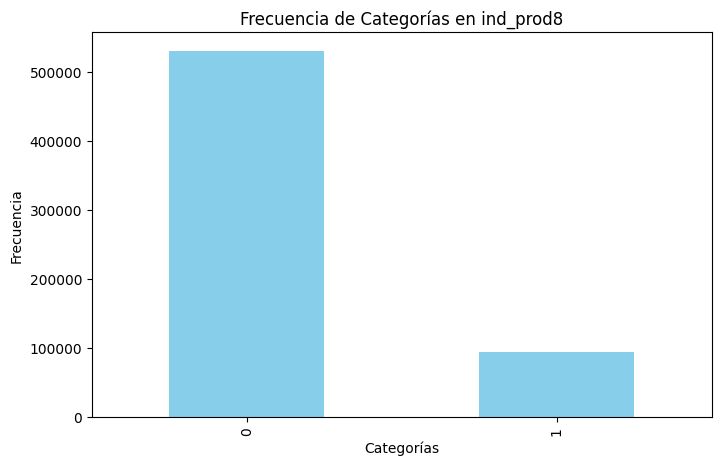

Porcentaje de nulos;  0.0
Frecuencia de categorías:
ind_prod9
0    593930
1     31540
Name: count, dtype: int64


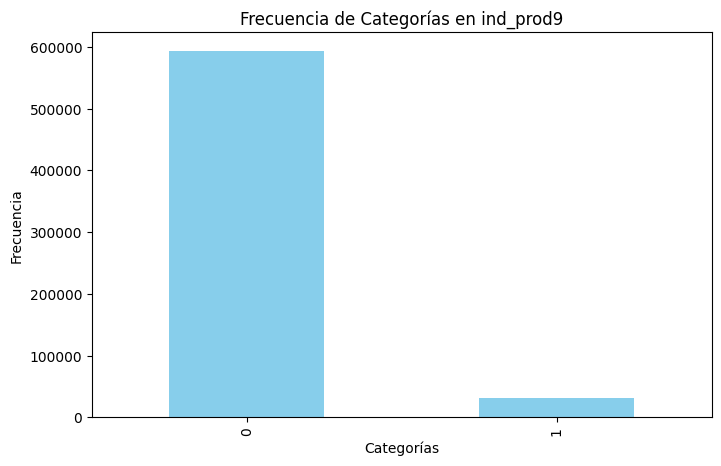

Porcentaje de nulos;  0.0
Frecuencia de categorías:
ind_prod10
0    623662
1      1808
Name: count, dtype: int64


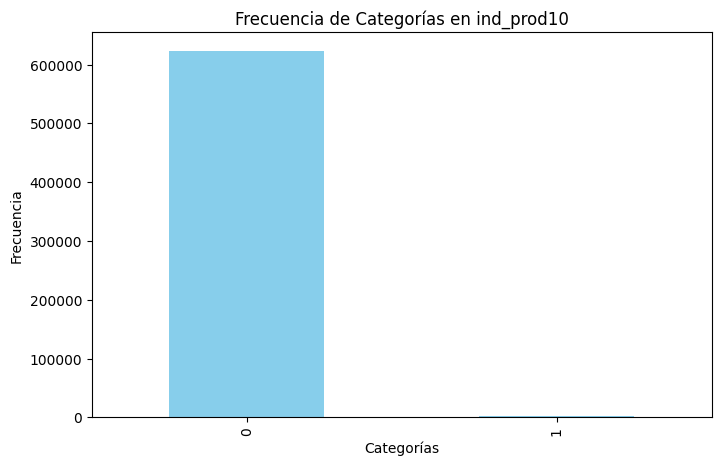

Porcentaje de nulos;  0.0
Frecuencia de categorías:
ind_prod11
0    623976
1      1494
Name: count, dtype: int64


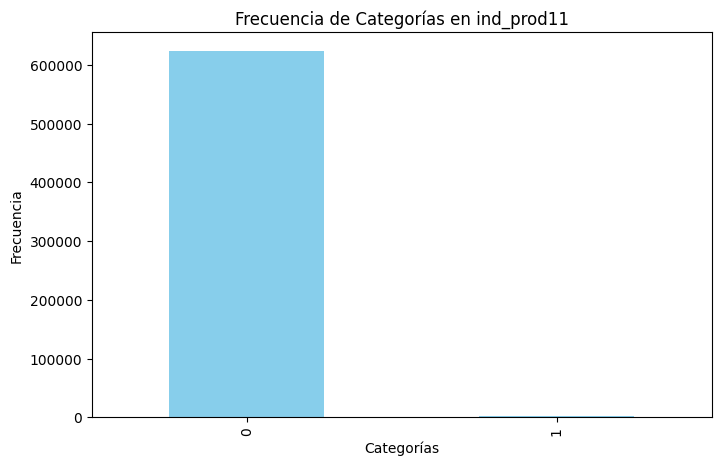

Porcentaje de nulos;  0.0
Frecuencia de categorías:
ind_prod12
0    593820
1     31650
Name: count, dtype: int64


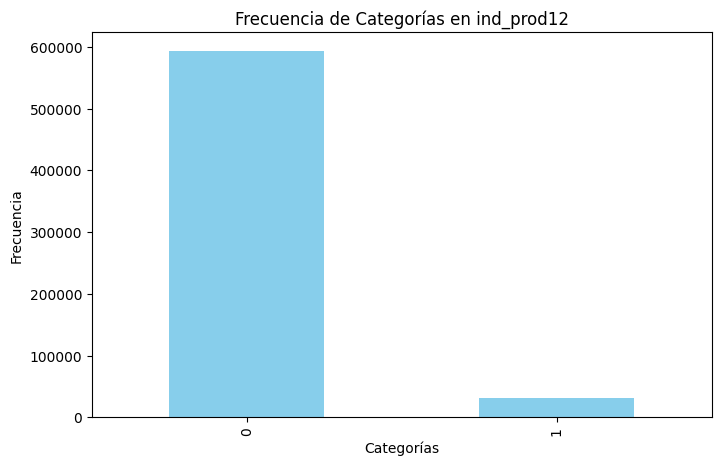

Porcentaje de nulos;  0.0
Frecuencia de categorías:
ind_prod13
0    568714
1     56756
Name: count, dtype: int64


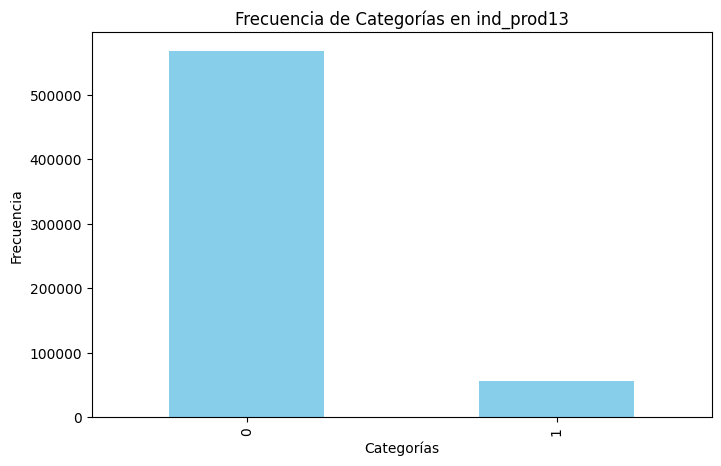

Porcentaje de nulos;  0.0
Frecuencia de categorías:
ind_prod14
0    612352
1     13118
Name: count, dtype: int64


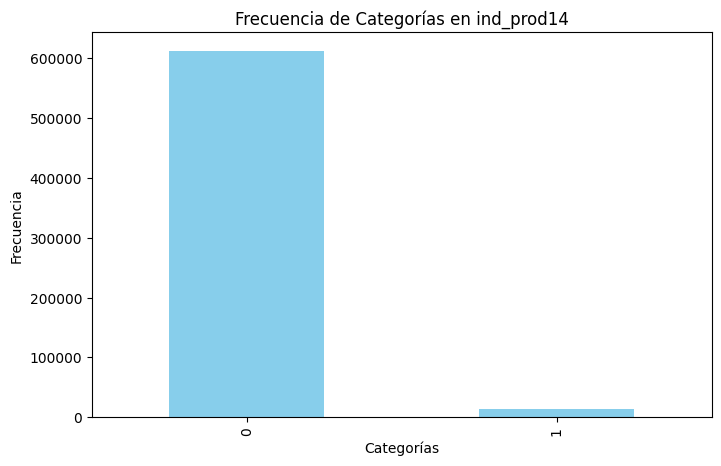

Porcentaje de nulos;  0.0
Frecuencia de categorías:
ind_prod15
0    621644
1      3826
Name: count, dtype: int64


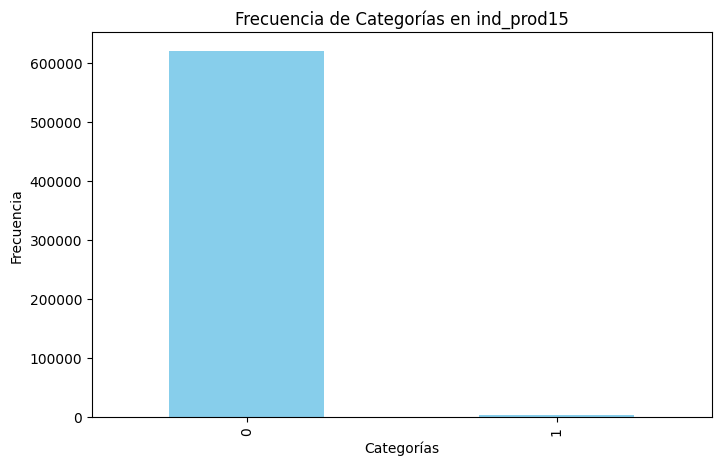

Porcentaje de nulos;  0.0
Frecuencia de categorías:
ind_prod16
0    618898
1      6572
Name: count, dtype: int64


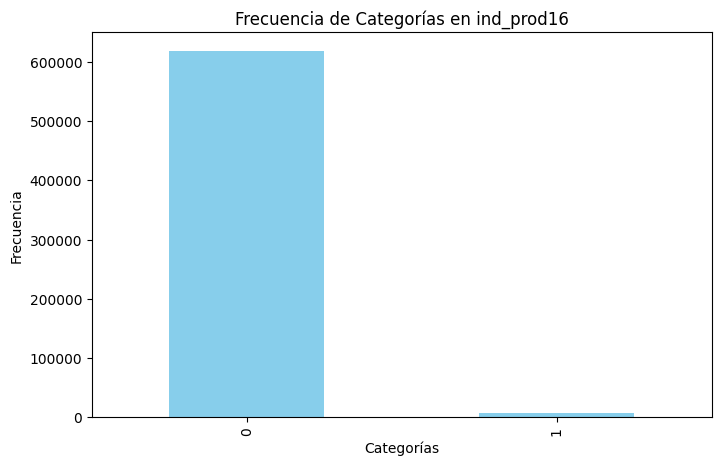

Porcentaje de nulos;  0.0
Frecuencia de categorías:
ind_prod17
0    623498
1      1972
Name: count, dtype: int64


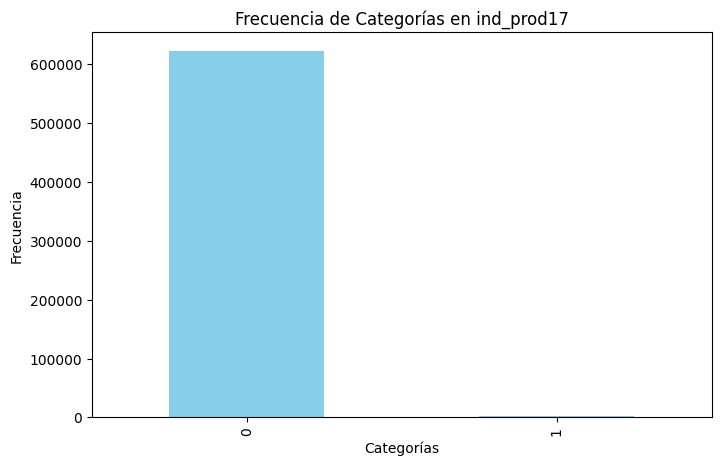

Porcentaje de nulos;  0.0
Frecuencia de categorías:
ind_prod18
0    588854
1     36616
Name: count, dtype: int64


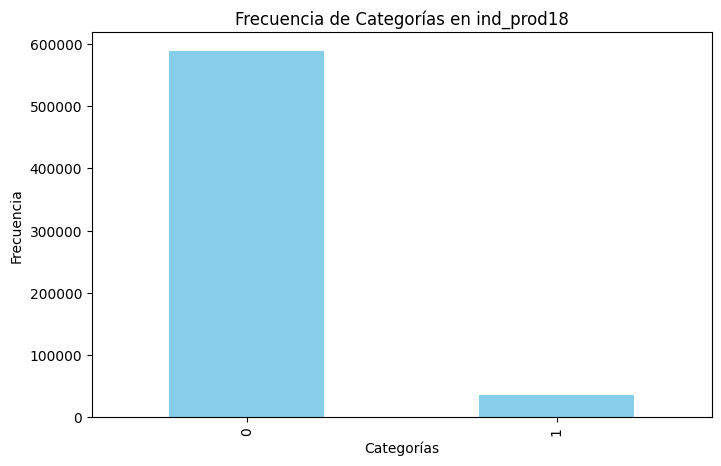

Porcentaje de nulos;  0.0
Frecuencia de categorías:
ind_prod19
0    592900
1     32570
Name: count, dtype: int64


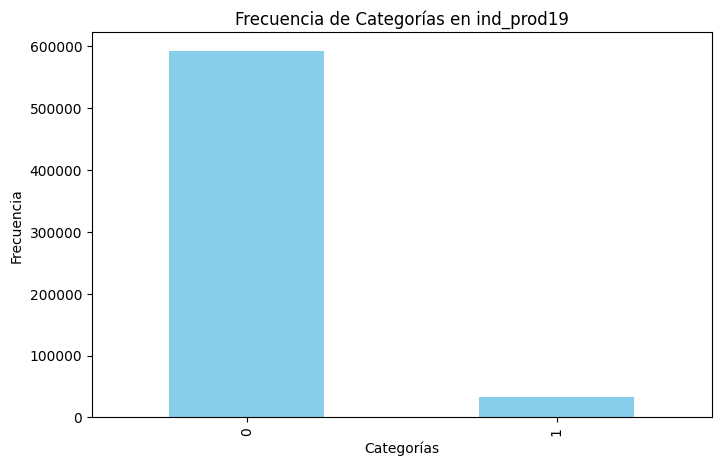

Porcentaje de nulos;  0.0
Frecuencia de categorías:
ind_prod20
0    607280
1     18190
Name: count, dtype: int64


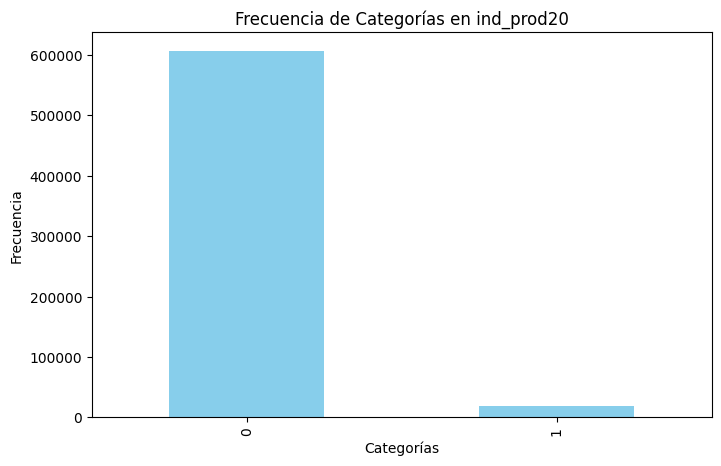

Porcentaje de nulos;  0.0
Frecuencia de categorías:
ind_prod21
0    622748
1      2722
Name: count, dtype: int64


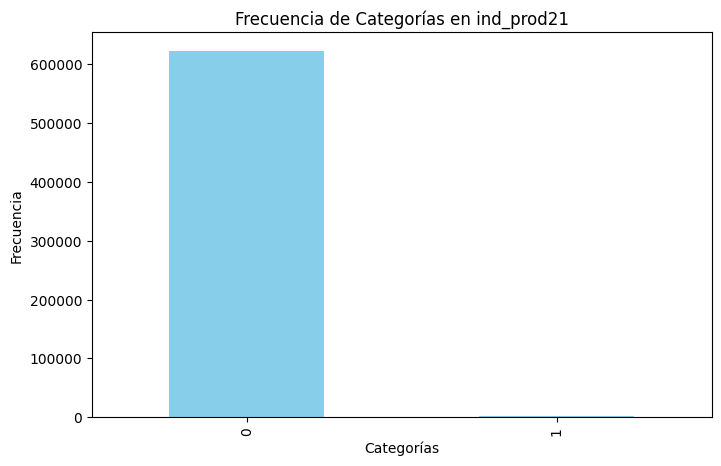

Porcentaje de nulos;  0.0
Frecuencia de categorías:
ind_prod22
0.0    586702
1.0     38768
Name: count, dtype: int64


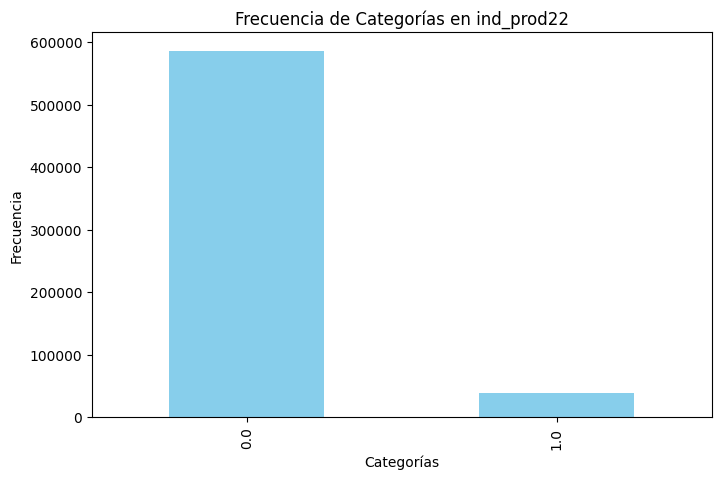

Porcentaje de nulos;  0.0
Frecuencia de categorías:
ind_prod23
0.0    583494
1.0     41976
Name: count, dtype: int64


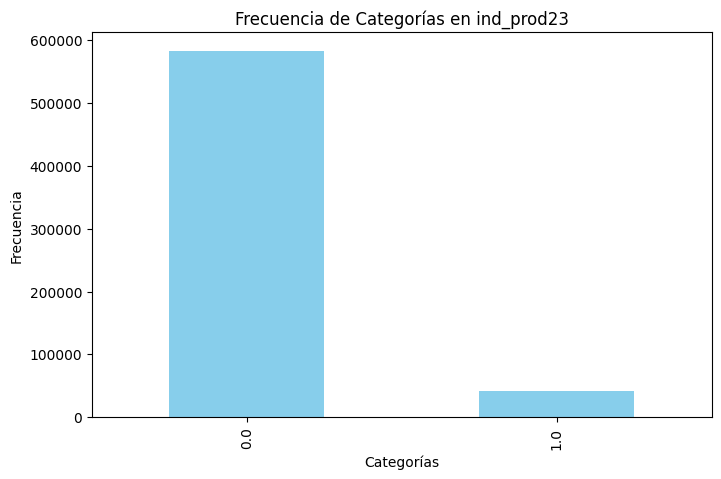

Porcentaje de nulos;  0.0
Frecuencia de categorías:
ind_prod24
0    537268
1     88202
Name: count, dtype: int64


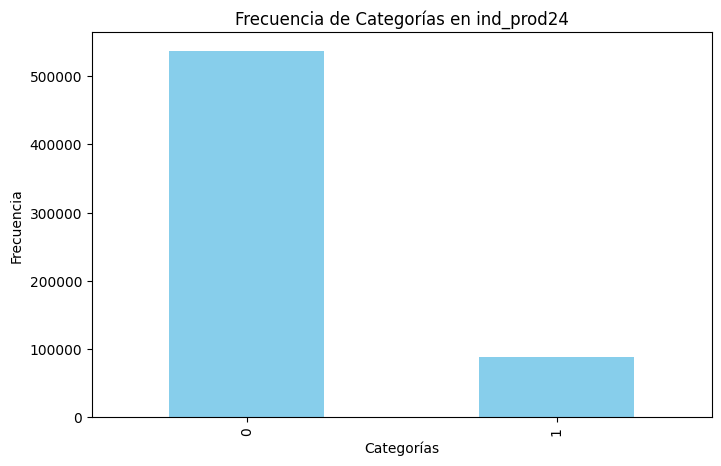

Porcentaje de nulos;  0.0
Frecuencia de categorías:
ind_prod25
0    578970
1     46500
Name: count, dtype: int64


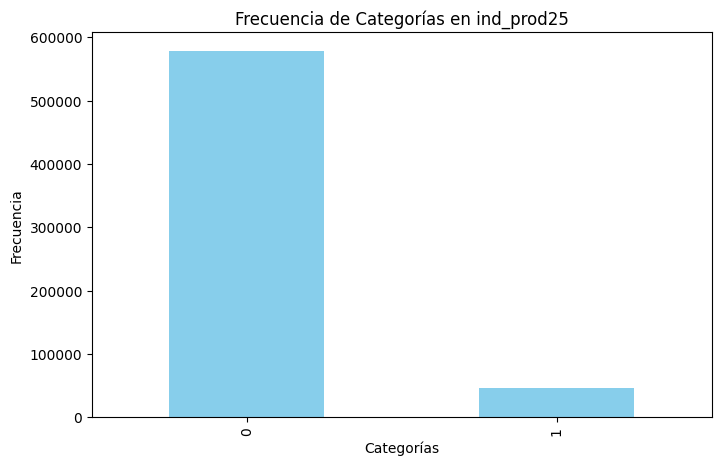

Porcentaje de nulos;  0.0
Frecuencia de categorías:
nombre_mes
September    83430
August       82090
July         80506
June         62510
May          62316
April        62142
March        61910
February     61608
January      61316
October       7642
Name: count, dtype: int64


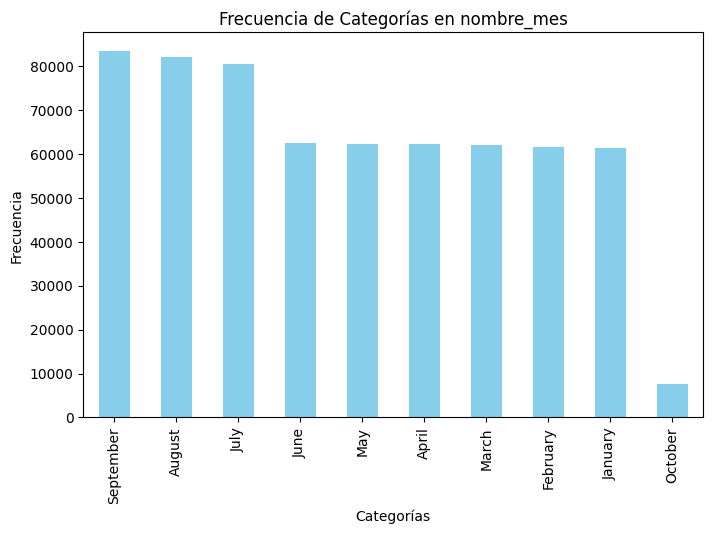

In [201]:

#Número de registros
n= 625470
for col in categoricas:
  # Cantidad de nulos
  cantidad_nulos = data_unida[col].isnull().sum()
  print("Porcentaje de nulos; ", cantidad_nulos / n * 100)
  # 1. Exploración de Frecuencias
  frecuencia_categoria = data_unida[col].value_counts()
  print("Frecuencia de categorías:")
  print(frecuencia_categoria)

  # Gráfico de barras para visualizar las frecuencias
  plt.figure(figsize=(8, 5))
  frecuencia_categoria.plot(kind='bar', color='skyblue')
  plt.title(f'Frecuencia de Categorías en {col}')
  plt.xlabel('Categorías')
  plt.ylabel('Frecuencia')
  plt.show()

 